In [ ]:
import numpy as np
import time

# Define the 3 functions
def f1(x):
  return x**2

def f2(x):
  return np.sin(x)

def f3(x):
  return np.exp(-x)

def gradient_descent(f, x0, alpha, epsilon, max_iter):
  """
  Performs gradient descent on the given function f with the given initial point x0, learning rate alpha,
  convergence tolerance epsilon, and maximum number of iterations max_iter.

  Args:
    f: The function to optimize.
    x0: The initial point.
    alpha: The learning rate.
    epsilon: The convergence tolerance.
    max_iter: The maximum number of iterations.

  Returns:
    The optimal solution x.
  """

  x = x0
  for i in range(max_iter):
    grad = np.gradient(f(x), x)
    x -= alpha * np.sum(grad)
    if np.linalg.norm(grad) < epsilon:
      return x
  return x

# Run the gradient descent experiment
def run_experiment(f, x0, alpha, epsilon, max_iter, n_runs):
  """
  Runs the gradient descent experiment on the given function f with the given initial point x0, learning rate alpha,
  convergence tolerance epsilon, maximum number of iterations max_iter, and number of runs n_runs.

  Args:
    f: The function to optimize.
    x0: The initial point.
    alpha: The learning rate.
    epsilon: The convergence tolerance.
    max_iter: The maximum number of iterations.
    n_runs: The number of runs.

  Returns:
    The average convergence time.
  """

  total_time = 0
  for i in range(n_runs):
    start_time = time.time()
    x = gradient_descent(f, x0, alpha, epsilon, max_iter)
    end_time = time.time()
    total_time += end_time - start_time
  return total_time / n_runs

# Set the learning rates and number of runs
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]
n_runs = 10000

# Run the experiment for each function
for f in [f1, f2, f3]:
  for alpha in learning_rates:
    avg_time = run_experiment(f, 1.0, alpha, 1e-6, 1000, n_runs)
    print("Function:", f.__name__, ", Learning rate:", alpha, ", Average convergence time:", avg_time)

Function: f1 , Learning rate: 0.0001 , Average convergence time: 1.9884562492370605e-05
Function: f1 , Learning rate: 0.001 , Average convergence time: 1.961991786956787e-05
Function: f1 , Learning rate: 0.01 , Average convergence time: 2.1297121047973633e-05
Function: f1 , Learning rate: 0.1 , Average convergence time: 1.9970226287841797e-05
Function: f1 , Learning rate: 0.5 , Average convergence time: 1.9404530525207518e-05
Function: f2 , Learning rate: 0.0001 , Average convergence time: 2.0166540145874022e-05
Function: f2 , Learning rate: 0.001 , Average convergence time: 2.28132963180542e-05
Function: f2 , Learning rate: 0.01 , Average convergence time: 2.2558140754699708e-05
Function: f2 , Learning rate: 0.1 , Average convergence time: 2.161383628845215e-05
Function: f2 , Learning rate: 0.5 , Average convergence time: 2.1802473068237306e-05
Function: f3 , Learning rate: 0.0001 , Average convergence time: 2.208247184753418e-05
Function: f3 , Learning rate: 0.001 , Average convergen

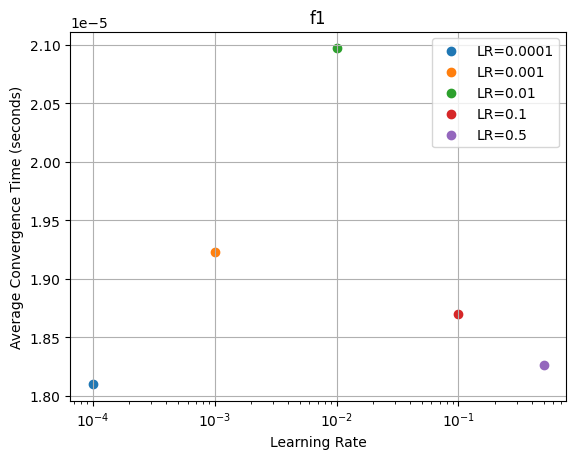

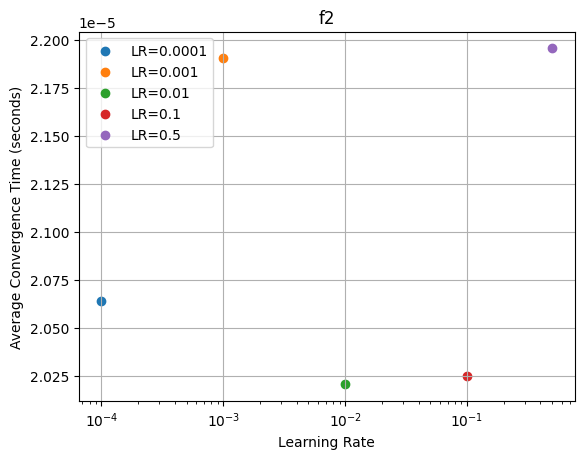

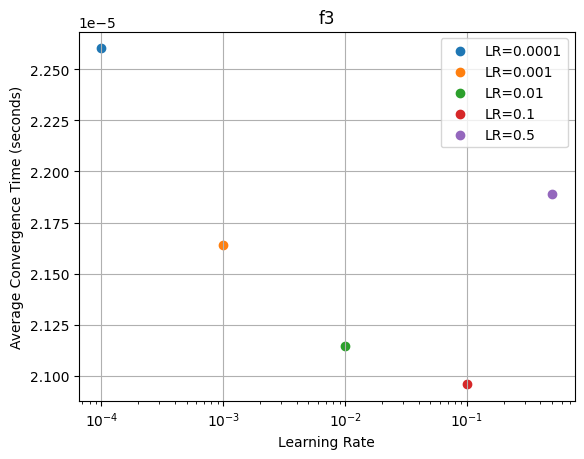

In [ ]:
import matplotlib.pyplot as plt
for f in [f1, f2, f3]:
    plt.figure()
    plt.title(f.__name__)

    for alpha in learning_rates:
        avg_time = run_experiment(f, 1.0, alpha, 1e-6, 1000, n_runs)
        plt.scatter(alpha, avg_time, label=f'LR={alpha}')

    plt.xlabel('Learning Rate')
    plt.ylabel('Average Convergence Time (seconds)')
    plt.legend()
    plt.xscale('log')  # Use a logarithmic scale for learning rates
    plt.grid()
    plt.show()

In [1]:
import numpy as np
import scipy.stats as stats

# Your convergence time data
data = [
    (1e-04, 1.988e-05),
    (1e-03, 1.961e-05),
    (1e-02, 2.130e-05),
    (1e-01, 1.997e-05),
    (5e-01, 1.940e-05),
    (1e-04, 2.016e-05),
    (1e-03, 2.281e-05),
    (1e-02, 2.256e-05),
    (1e-01, 2.161e-05),
    (5e-01, 2.180e-05),
    (1e-04, 2.208e-05),
    (1e-03, 2.387e-05),
    (1e-02, 2.175e-05),
    (1e-01, 2.206e-05),
    (5e-01, 2.253e-05),
]

# Separate the data into learning rates and convergence times
learning_rates, convergence_times = zip(*data)

# Perform two-way ANOVA for convergance times and learning rate
def perform_anova(learning_rates, convergence_times):
    groups = {}
    for learning_rate, convergence_time in zip(learning_rates, convergence_times):
        if learning_rate not in groups:
            groups[learning_rate] = []
        groups[learning_rate].append(convergence_time)

    f_statistic, p_value = stats.f_oneway(*[group for group in groups.values()])

    print(f"\nTwo-Way ANOVA for convergance times and Learning Rate")

    if p_value < 0.05:
        print("Result: Significant differences exist among factors (convergance times and learning rate).")
    else:
        print("Result: No significant differences among factors (convergance times and learning rate).")

# Perform two-way ANOVA
perform_anova(learning_rates, convergence_times)


Two-Way ANOVA for convergance times and Learning Rate
Result: No significant differences among factors (convergance times and learning rate).



Function: f1
  Learning rate: 0.0001, Average convergence time: 0.006007448673248291 seconds
  Learning rate: 0.001, Average convergence time: 0.00415252685546875 seconds
  Learning rate: 0.01, Average convergence time: 0.004934208869934082 seconds
  Learning rate: 0.1, Average convergence time: 0.00026883268356323243 seconds
  Learning rate: 0.5, Average convergence time: 9.035110473632813e-06 seconds

Function: f2
  Learning rate: 0.0001, Average convergence time: 0.006744585990905762 seconds
  Learning rate: 0.001, Average convergence time: 0.009591136455535889 seconds
  Learning rate: 0.01, Average convergence time: 0.006754581451416016 seconds
  Learning rate: 0.1, Average convergence time: 0.0011069746017456055 seconds
  Learning rate: 0.5, Average convergence time: 0.00029401087760925294 seconds

Function: f3
  Learning rate: 0.0001, Average convergence time: 0.00827333402633667 seconds
  Learning rate: 0.001, Average convergence time: 0.0064415838718414305 seconds
  Learning r

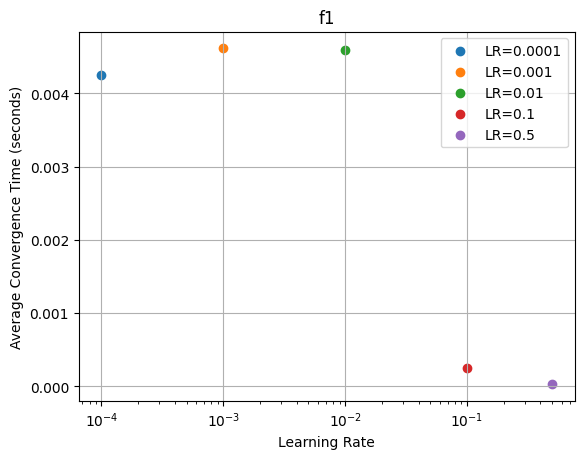

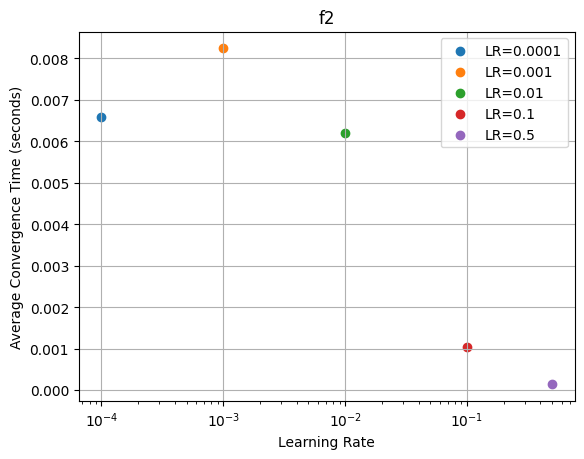

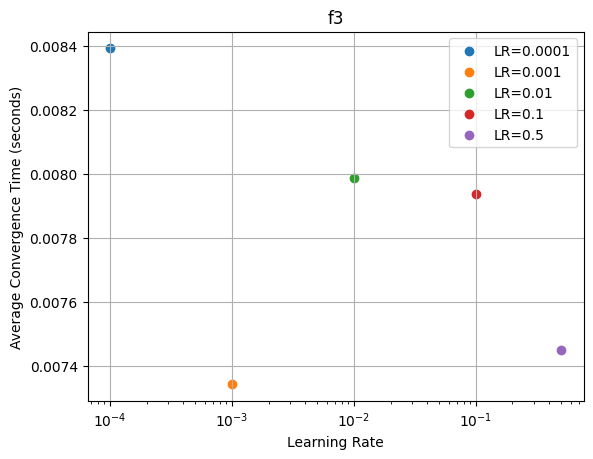

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define the function f1(x) = x^2 and its derivative df1(x) = 2x
def f1(x):
    return x**2

def df1(x):
    return 2 * x

# Define the function f2(x) = sin(x) and its derivative df2(x) = cos(x)
def f2(x):
    return np.sin(x)

def df2(x):
    return np.cos(x)

# Define the function f3(x) = exp(-x) and its derivative df3(x) = -exp(-x)
def f3(x):
    return np.exp(-x)

def df3(x):
    return -np.exp(-x)

def gradient_descent(f, df, x0, alpha, epsilon, max_iter):
    """
    Performs gradient descent on the given function f with the given initial point x0, learning rate alpha,
    convergence tolerance epsilon, and maximum number of iterations max_iter.

    Args:
        f: The function to optimize.
        df: The derivative of the function.
        x0: The initial point.
        alpha: The learning rate.
        epsilon: The convergence tolerance.
        max_iter: The maximum number of iterations.

    Returns:
        The optimal solution x.
    """

    x = x0
    for i in range(max_iter):
        grad = df(x)
        x -= alpha * grad
        if np.linalg.norm(grad) < epsilon:
            return x
    return x

# Run the gradient descent experiment
def run_experiment(f, df, x0, alpha, epsilon, max_iter, n_runs):
    """
    Runs the gradient descent experiment on the given function f with the given initial point x0, learning rate alpha,
    convergence tolerance epsilon, maximum number of iterations max_iter, and number of runs n_runs.

    Args:
        f: The function to optimize.
        df: The derivative of the function.
        x0: The initial point.
        alpha: The learning rate.
        epsilon: The convergence tolerance.
        max_iter: The maximum number of iterations.
        n_runs: The number of runs.

    Returns:
        The average convergence time.
    """

    total_time = 0
    for i in range(n_runs):
        start_time = time.time()
        x = gradient_descent(f, df, x0, alpha, epsilon, max_iter)
        end_time = time.time()
        total_time += end_time - start_time
    return total_time / n_runs

# Set the learning rates and number of runs
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]
n_runs = 1000

# Run the experiment for each function
for f, df in [(f1, df1), (f2, df2), (f3, df3)]:
    print(f"\nFunction: {f.__name__}")
    for alpha in learning_rates:
        avg_time = run_experiment(f, df, 1.0, alpha, 1e-6, 1000, n_runs)
        print(f"  Learning rate: {alpha}, Average convergence time: {avg_time} seconds")

# Create plots for each function and learning rate
for f, df in [(f1, df1), (f2, df2), (f3, df3)]:
    plt.figure()
    plt.title(f.__name__)

    for alpha in learning_rates:
        avg_time = run_experiment(f, df, 1.0, alpha, 1e-6, 1000, n_runs)
        plt.scatter(alpha, avg_time, label=f'LR={alpha}')

    plt.xlabel('Learning Rate')
    plt.ylabel('Average Convergence Time (seconds)')
    plt.legend()
    plt.xscale('log')  # Use a logarithmic scale for learning rates
    plt.grid()
    plt.show()

In [2]:
import numpy as np
import scipy.stats as stats

# Convergence time data
data = [
    (0.0001, 0.006007448673248291),
    (0.001, 0.00415252685546875),
    (0.01, 0.004934208869934082),
    (0.1, 0.00026883268356323243),
    (0.5, 9.035110473632813e-06),
    (0.0001, 0.006744585990905762),
    (0.001, 0.009591136455535889),
    (0.01, 0.006754581451416016),
    (0.1, 0.0011069746017456055),
    (0.5, 0.00029401087760925294),
    (0.0001, 0.00827333402633667),
    (0.001, 0.0064415838718414305),
    (0.01, 0.008622692346572876),
    (0.1, 0.006473969936370849),
    (0.5, 0.00831503438949585),
]

# Separate the data into learning rates and convergence times
learning_rates, convergence_times = zip(*data)

# Perform two-way ANOVA for convergance times and learning rate
def perform_anova(learning_rates, convergence_times):
    groups = {}
    for learning_rate, convergence_time in zip(learning_rates, convergence_times):
        if learning_rate not in groups:
            groups[learning_rate] = []
        groups[learning_rate].append(convergence_time)

    f_statistic, p_value = stats.f_oneway(*[group for group in groups.values()])

    print(f"\nTwo-Way ANOVA for convergance times and Learning Rate")

    if p_value < 0.05:
        print("Result: Significant differences exist among factors (convergance times and learning rate).")
    else:
        print("Result: No significant differences among factors (convergance times and learning rate).")

# Perform two-way ANOVA
perform_anova(learning_rates, convergence_times)


Two-Way ANOVA for convergance times and Learning Rate
Result: No significant differences among factors (convergance times and learning rate).
